In [1]:
import numpy as np

z = np.arange(-10,10,0.01)
g = 1/(1+np.exp(-z))

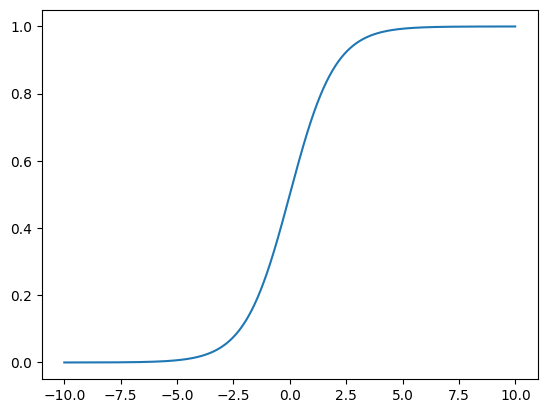

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(z,g)

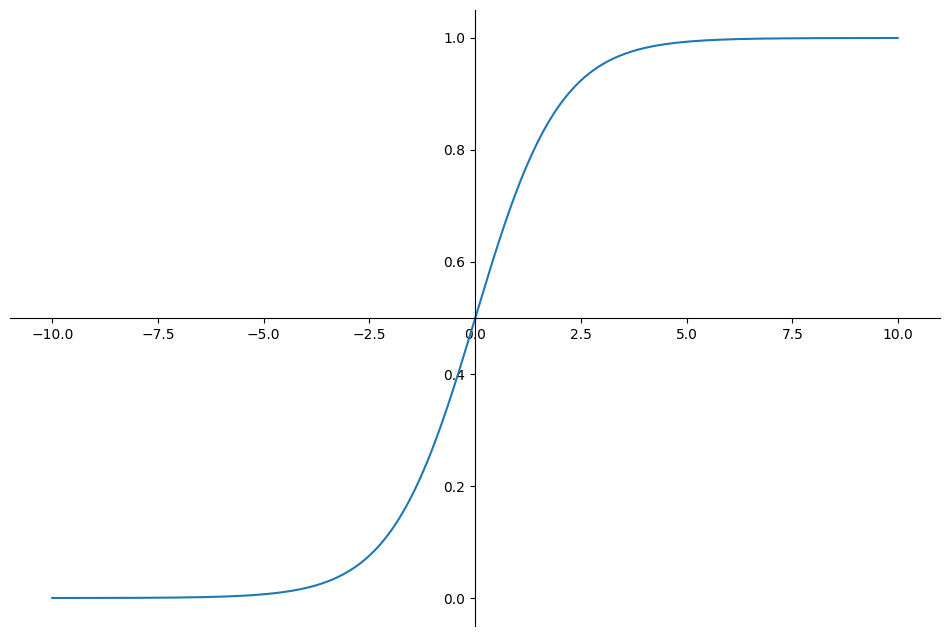

In [9]:
plt.figure(figsize=(12,8))
ax = plt.gca()

# 그래프설정
ax.plot(z,g)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

plt.show()

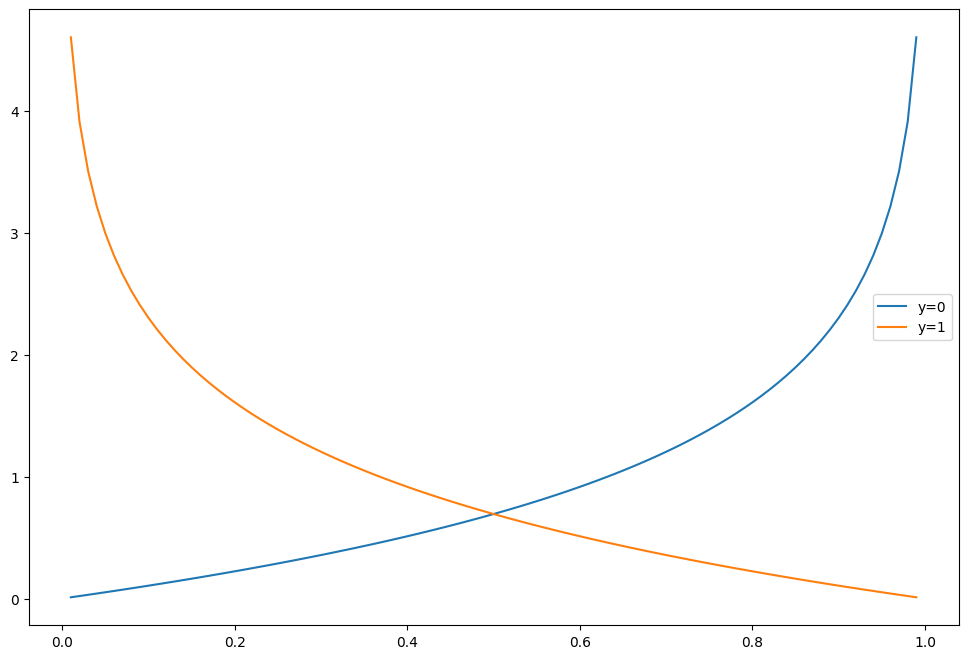

In [13]:
h = np.arange(0.01, 1, 0.01)

c0 = -np.log(1-h)
c1 = -np.log(h)

plt.figure(figsize=(12,8))
plt.plot(h, c0, label = 'y=0')
plt.plot(h, c1, label = 'y=1')
plt.legend()

plt.show()

In [16]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/winequality-red.csv'

white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep= ';')
white_wine = pd.read_csv(white_url, sep= ';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0


In [17]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)   #solver = 최적화 알고리즘을 선택한다 데이터 수가 많지 않으면 liblinear 선택하면 된다
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.7427361939580527
0.7438461538461538


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', LogisticRegression(solver='liblinear', random_state=13))]
pipe = Pipeline(estimators)

In [22]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [23]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.7444679622859341
0.7469230769230769


In [25]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

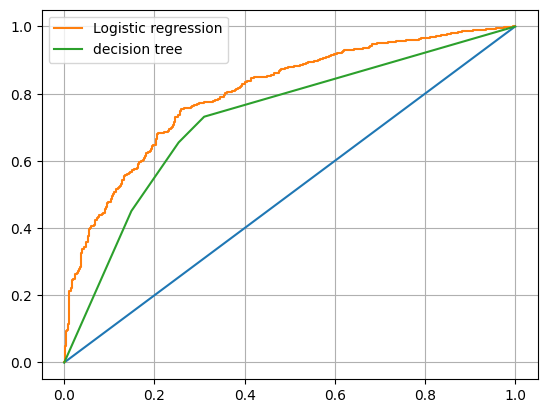

In [26]:
from sklearn.metrics import roc_curve

models = {'Logistic regression' :pipe, 'decision tree' : wine_tree}

plt.Figure(figsize=(10,8))
plt.plot([0,1],[0,1])
for model_name, model in models.items():  # 선언 두가지 모델에 대한 정보를 그래프로 그릴거고 첫번쨰는 로지스틱 리그리레이션 파이프 두번째는 디시즌 트리 와인트리에 대한 그래프를 그리겠다. 아이템즈 사용하면 키와 벨류 사용할 수 있다.
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)  # _를 사용하면 뒤에 오는 값에 오는걸 사용하지 않겠다.
    plt.plot(fpr,tpr, label = model_name)

plt.grid()
plt.legend()
plt.show()

In [27]:
import pandas as pd

PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/diabetes.csv'

PIMA = pd.read_csv(PIMA_url)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


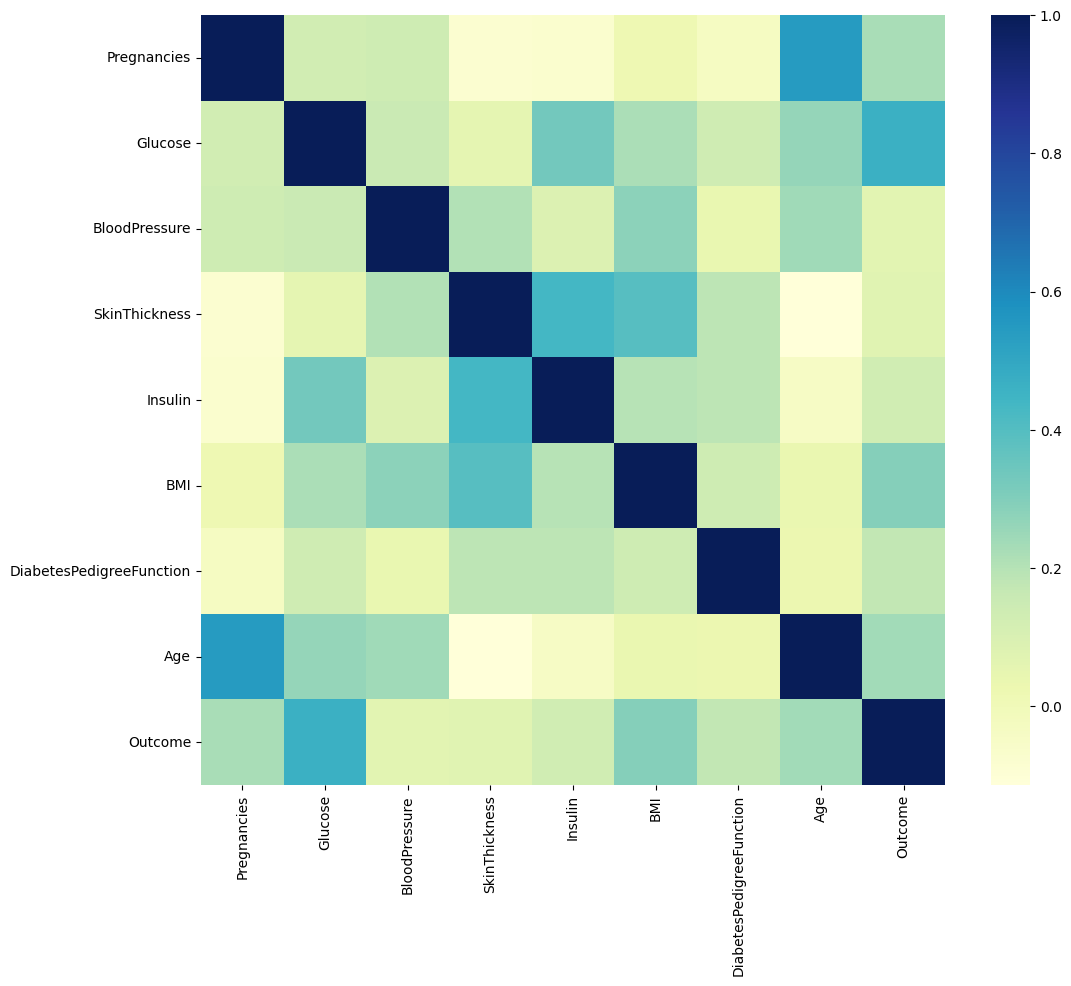

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(), cmap='YlGnBu')   #corr() 상관관계를 계산해낸다
plt.show()

In [31]:
(PIMA==0).astype(int).sum()   # 0이 몇개 있는지 int로 세어서 계산해내는 코드

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [32]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())  #0인 값이 있으면 mean() 퍙균값으로 대체해줘라
(PIMA ==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

X = PIMA.drop(['Outcome'], axis= 1)
y = PIMA['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13 , stratify= y)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [('scaler', StandardScaler()),
              ('clf', LogisticRegression(solver='liblinear', random_state=13))]
pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [35]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)

print(accuracy_score(y_test, pred)) # y_test와 예측된 결과
print(recall_score(y_test,pred))
print(precision_score(y_test,pred))
print(roc_auc_score(y_test, pred))
print(f1_score(y_test, pred))

0.7727272727272727
0.6111111111111112
0.7021276595744681
0.7355555555555556
0.6534653465346535


In [36]:
coeff = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)

In [37]:
coeff

[np.float64(0.3542658884412648),
 np.float64(1.2014244425037581),
 np.float64(-0.15840135536286715),
 np.float64(0.03394657712929963),
 np.float64(-0.16286471953988135),
 np.float64(0.620404521989511),
 np.float64(0.3666935579557874),
 np.float64(0.1719596544703511)]

<Axes: ylabel='Features'>

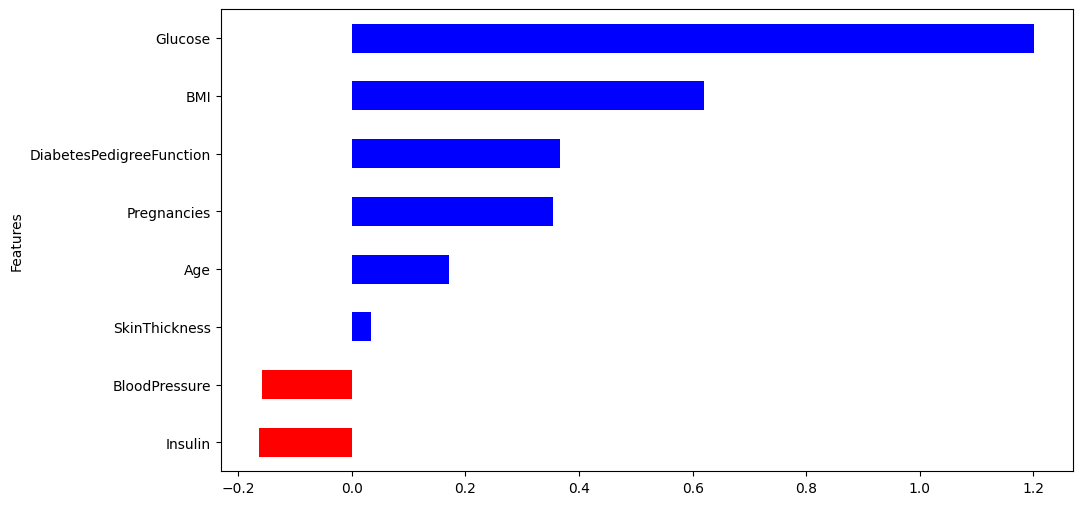

In [38]:
features = pd.DataFrame({'Features':labels, 'importance':coeff})
features.sort_values(by = ['importance'], ascending=True , inplace=True)
features['positive'] = features['importance']>0
features.set_index('Features', inplace=True)
features['importance'].plot(kind='barh',
                            figsize=(11,6),
                            color=features['positive'].map({True:'blue',
                                                            False:'red'}))

In [ ]:
i